# FIle to wrap around both prior notebooks (begin data effected models)


atm gettign ploitting to work and format nicely

In [241]:
%run pediction_model.ipynb
%run Grab_and_CleanData.ipynb

# Found a better repo for this here: 
https://github.com/Mythobeast/epidemicmodels

In [242]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import WeekdayLocator, MO  # TU, WE, TH, FR, SA, SU
from matplotlib.dates import DateFormatter
%matplotlib inline 
import pandas as pd

# get case data for plotting and comparision

In [243]:
#test case comment out if not in use.
csv_names= ['US_case_data.csv','US_pop_data.csv','us_demo_data.csv']
assemble_us_data(csv_names, False) #add triggger that makes it skip certain parts 

cnty= 'new york'
data=grab_case_data(csv_names, 'new york')

cases=np.array(data.iloc[0])
dayss = pd.to_datetime(data.keys(), format='%m/%d/%y')

i=0
while(cases[i] == 0):
    i=i+1
t_cases=cases[i:]
t_days=dayss[i:]

# Create Model data 

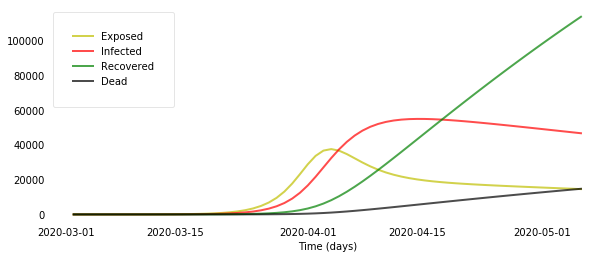

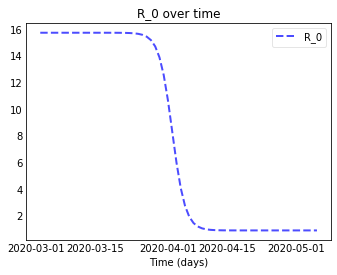

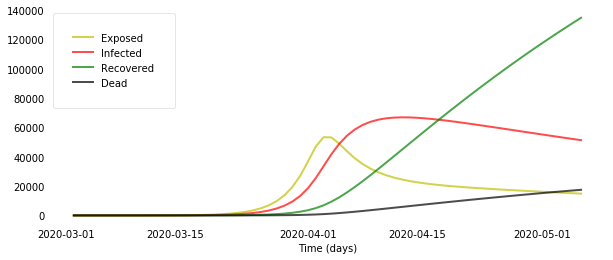

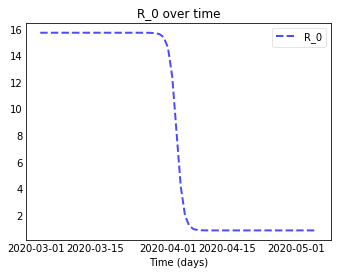

In [244]:
from seir_model import SEIRModel

population= grab_cnty_pop(csv_names, cnty)
infection_duration= 14 #roughly two weeks
r0_base= 15.75
info= .65, 31, .93
incubation =5 # https://annals.org/aim/fullarticle/2762808/incubation-period-coronavirus-disease-2019-covid-19-from-publicly-reported
info1= 1.25, 32, .86

model =SEIRModel()

model.set_vars(population, infection_duration ,r0_base , info, incubation)
S, E, I, R, D = model.run_period(len(t_days))
R00= [model.daily_r0(i) for i in range(len(t_days))]

model.set_vars(population, infection_duration ,r0_base , info1, incubation)
S1, E1, I1, R1, D1 = model.run_period(len(t_days))
R01= [model.daily_r0(i) for i in range(len(t_days))]

#debug checking
plotseird(t_days, S, E, I, R, D,R0=R00)
plotseird(t_days, S1, E1, I1, R1, D1,R0=R01)




# Compare models to real case data

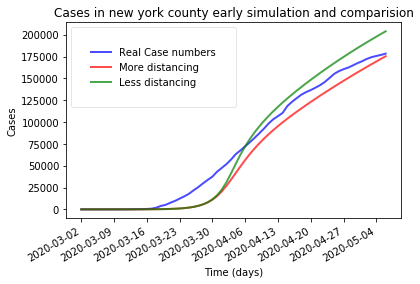

In [245]:
# edit model to then make other data eg deaths more accurate
#print(t_cases)

fig, ax = plt.subplots()
ax.plot(t_days, t_cases, 'b', alpha=0.7, linewidth=2, label='Real Case numbers')
ax.plot(t_days, I+R+D, 'r', alpha=0.7, linewidth=2, label='More distancing') 
ax.plot(t_days, I1+R1+D1, 'g', alpha=0.7, linewidth=2, label='Less distancing')
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=MO))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Cases')
title= 'Cases in ' + cnty + ' county early simulation and comparision'
ax.title.set_text(title)
legend = ax.legend(borderpad=2.0)
legend.get_frame().set_alpha(0.5)
plt.show()
